In [407]:
# 1vs1 match functions
def winner_civ(player, dict_civ):
    if player[0]['won'] == True:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def loser_civ(player, dict_civ):
    if player[0]['won'] == False:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def get_average_rating (players):
    rat1=players[0]['rating']
    rat2=players[1]['rating']
    if rat1 == None or rat2 == None:
        if rat1 != None:
            return rat1
        if rat2 != None:
            return rat2
        
        return None
    else:
        return (rat1 + rat2)/2

# team match functions
def get_winner_team_number(players):
    for player in players:
        if player['won'] == True:
            return player['team']

def winner_civ_team(players, dict_civ, position):
    list_pos=[]
    for player in players:
        if player['won'] == True:
            t = (player['color'], player['civ'])
            list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def loser_civ_team(players, dict_civ, position):
    list_pos=[]
    winner_number=get_winner_team_number(players)
    for player in players:
        if player['won'] == False:
            if player['team'] != winner_number:
                t = (player['color'], player['civ'])
                list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def get_average_rating_team(players):
    rat_sum=0
    divider=0
    num_players=len(players)
    for player in players:
        if player['rating'] != None:
            rat_sum += player['rating']
            divider += 1
            
    if (divider < (num_players/2)):
        return None
    else:
        return (rat_sum/divider)

In [408]:
has_relevant_water = {
            "Arabia": False,
            "Archipelago": True,
            "Baltic": True,
            "Black Forest": False,
            "Coastal": True,
            "Continental": True,
            "Crater Lake": True,
            "Fortress": False,
            "Gold Rush": False,
            "Highland": True,
            "Islands": False,
            "Mediterranean": False,
            "Migration": False,
            "Rivers": False,
            "Team Islands": False,
            "Full Random": True,
            "Scandinavia": True,
            "Mongolia": False,
            "Yucatan": False,
            "Salt Marsh": True,
            "Arena": False,
            "Oasis": True,
            "Ghost Lake": False,
            "Nomad": True,
            "Iberia": True,
            "Britain": True,
            "Mideast": True,
            "Texas": True,
            "Italy": True,
            "Central America": True,
            "France": True,
            "Norse Lands": True,
            "Sea of Japan (East Sea)": True,
            "Byzantium": True,
            "Custom": True,
            "Random Land Map": False,
            "Random Real World Map": True,
            "Blind Random": True,
            "Random Special Map": True,
            "Acropolis": False,
            "Budapest": True,
            "Cenotes": True,
            "City of Lakes": True,
            "Golden Pit": False,
            "Hideout": False,
            "Hill Fort": False,
            "Lombardia": False,
            "Steppe": False,
            "Valley": False,
            "MegaRandom": True,
            "Hamburger": True,
            "CtR Random": True,
            "CtR Monsoon": False,
            "CtR Pyramid Descent": False,
            "CtR Spiral": False,
            "Kilimanjaro": False,
            "Mountain Pass": False,
            "Nile Delta": True,
            "Serengeti": False,
            "Socotra": False,
            "Amazon": True,
            "China": True,
            "Horn of Africa": True,
            "India": True,
            "Madagascar": True,
            "West Africa": True,
            "Bohemia": False,
            "Earth": True,
            "Canyons": False,
            "Enemy Archipelago": True,
            "Enemy Islands": True,
            "Far Out": False,
            "Front Line": False,
            "Inner Circle": False,
            "Motherland": True,
            "Open Plains": False,
            "Ring of Water": True,
            "Snakepit": True,
            "The Eye": True,
            "Australia": True,
            "Indochina": True,
            "Indonesia": True,
            "Strait of Malacca": True,
            "Philippines": True,
            "Bog Islands": True,
            "Mangrove Jungle": True,
            "Pacific Islands": True,
            "Sandbank": False,
            "Water Nomad": True,
            "Jungle Islands": True,
            "Holy Line": False,
            "Border Stones": False,
            "Yin Yang": True,
            "Jungle Lanes": False,
            "Alpine Lakes": False,
            "Bogland": False,
            "Mountain Ridge": False,
            "Ravines": False,
            "Wolf Hill": False,
            "Antarctica": True,
            "Custom Map Pool": True,
            "Golden Swamp": True,
            "Four Lakes": True,
            "Land Nomad": False
            }
import requests
import json

url="https://aoe2.net/api/strings?game=aoe2de&language=en"
req=requests.get(url)
dict_file=json.loads(req.content)

civ_dict={}
for civ in dict_file['civ']:
    civ_dict[civ['id']]=civ['string']

map_dict={}
for map_t in dict_file['map_type']:
    map_dict[map_t['id']]=map_t['string']

In [409]:
import pandas
from IPython.display import display
import matplotlib.pyplot as plt

df=pandas.read_json('matches_dataset_filtered.json', dtype={'match_id': int, 'match_uuid': 'string', 'num_players': int,
                                                        'map_type' : int, 'rating_type': int,'visibility' : int,
                                                        'duration' : float, 'players' : [dict]})
pandas.options.display.max_columns = None

In [410]:
df['num_players']=df['num_players'].astype('category')
df['map_type']=df['map_type'].astype('category')
df['rating_type']=df['rating_type'].astype('category')
df['visibility']=df['visibility'].astype('category')

In [411]:
df.dtypes

map_type       category
match_id          int64
match_uuid       object
num_players    category
players          object
rating_type    category
visibility     category
duration        float64
dtype: object

<span style="font-size:medium;">
Verificamos se o mapa tem água de forma distribuída por sua área, pois tecnologias e unidades navais só são relevantes para a analse se o mapa tiver água.
</span>

In [412]:
df['has_relevant_water']=df['map_type'].map(map_dict)
df['has_relevant_water']=df['has_relevant_water'].map(has_relevant_water)
df['has_relevant_water']=df['has_relevant_water'].astype('category')

In [413]:
df

,map_type,match_id,match_uuid,num_players,players,rating_type,visibility,duration,has_relevant_water
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",2,0,62.966667,False
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",2,0,41.466667,False
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",2,0,45.966667,False
3,125,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",4,0,116.266667,False
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",2,0,96.300000,False
...,...,...,...,...,...,...,...,...,...
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",2,0,43.466667,False
59990,29,42259160,711b0658-7607-7f4f-8155-dbcc7075d238,8,"[{'civ': 20, 'clan': None, 'color': 4, 'countr...",4,0,127.366667,False
59996,87,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",2,0,63.833333,False
59997,12,42259207,441f5659-fb65-f649-b758-97bf52745f75,8,"[{'civ': 21, 'clan': None, 'color': 4, 'countr...",4,1,89.966667,False


<span style="font-size:medium;">
Separamos o DataFrame em dois: um para partidas onde há apenas um jogador contra outro, "df_x1", e outro para partidas de time, "df_team". As dinâmicas de times, sinergia entre as civilizações e se uma está em uma posição de flanco enquanto seu aliado fica por trás das linhas de combate influenciam no combate.
</span>

In [414]:
df_x1=df[df['rating_type'] == 2]
df_team=df[df['rating_type'] == 4]

df_x1=df_x1.drop('rating_type', 1)
df_team=df_team.drop('rating_type', 1)

<span style="font-size:medium;">
extraímos qual civilização ganhou ou perdeu, a partir da coluna "players", e criamos duas colunas: "wCiv" para os vencedores e "lCiv" para os perdedores.

Também extraímos a informação da classificação (ou "rating") de cada jogador e calculamos o "rating" médio da partida. Os jogadores são pareados na partida através da sua classificação, o que significa que os jogadores das partidas têm classificações muito próximas. Portanto, em df_x1, se a informação da classificação de um dos jogadores não estiver presente, o "rating" médio será calculado como sendo equivalente ao rating do outro jogador.
</span>

In [415]:
df_x1['wCiv']=df_x1['players'].apply(winner_civ, args=(civ_dict, ))

df_x1['lCiv']=df_x1['players'].apply(loser_civ, args=(civ_dict, ))

df_x1['average_rating']=df_x1['players'].apply(get_average_rating)

In [416]:
df_x1['wCiv']=df_x1['wCiv'].astype('category')
df_x1['lCiv']=df_x1['lCiv'].astype('category')

In [417]:
len(df_x1)

22225

In [418]:
len(df_x1[df_x1['average_rating'].isnull()])

122

<span style="font-size:medium;">
Em algumas partidas a classificação de ambos os jogadores foi perdida, portanto algumas linhas na coluna "average_rating" ficaram como "NaN", como são poucas linhas optamos por excluí-las.
</span>


In [419]:
df_x1=df_x1[df_x1['average_rating'].isnull() == False]
df_x1

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,62.966667,False,Byzantines,Magyars,1234.0
1,9,40745265,15f45199-5ce5-2247-a421-9f6cc28afa72,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,41.466667,False,Incas,Britons,1111.0
2,9,40745258,5b9697b8-366d-8748-a967-c34722ffe377,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,45.966667,False,Ethiopians,Mayans,1202.5
4,9,40745189,40d77d0b-b08c-f945-883e-3fccc7b1b8a4,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,96.300000,False,Mayans,Franks,1453.0
16,9,40745343,3b1f86e3-85d4-7248-912b-1506c1d0f44b,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,53.966667,False,Magyars,Vikings,1167.0
...,...,...,...,...,...,...,...,...,...,...,...
59985,9,42259167,3e33efe4-02c4-c34f-b47c-f5097b2eae19,2,"[{'civ': 7, 'clan': None, 'color': 2, 'country...",0,63.166667,False,Chinese,Chinese,1692.5
59988,9,42259216,fbf6ea6a-08ff-d746-8403-f4f45d932b15,2,"[{'civ': 13, 'clan': None, 'color': 2, 'countr...",0,82.866667,False,Byzantines,Incas,926.5
59989,29,42259211,fba9486f-1954-6b4f-a37f-d9b55012de9c,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,43.466667,False,Franks,Mongols,1103.0
59996,87,42259214,a5247657-5067-3c47-96f0-0dc3a834063d,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,63.833333,False,Franks,Goths,1297.5


A coluna de "players" já não é mais necessária.

In [420]:
df_x1=df_x1.drop('players', 1)

<span style="font-size:medium;">

Semelhante como fizemos em df_x1, criamos colunas para os vencedores e perdedores, as partidas podem ter até 4 jogadores por time, portanto separamos 4 colunas para os vencedores e 4 colunas para os perdedores, caso os times sejam compostos por 3 membros cada, as ultimas colunas terão o valor "None" atribuído a elas, analogamente acontece se a partida for compostas por times de 2 participantes em cada.

As civilizaçẽos estão dispostas nas colunas respeitando a ordem em que elas estavam distribuídas em batalha, um exemplo: em um jogo de 3 contra 3, a coluna "wCiv1" seria ocupada pela civilização, do time vencedor, que estava em um dos flanco da batalha, a coluna "wCiv2" seria ocupada pela civilização do time vencedor que ficou guardada entre suas aliadas, e a coluna "wCiv3" seria ocupada pela civilização, do time vencedor, que estava no outro flanco da batalha, analogamente acontece com o time perdedor. De forma semelhante acontece com partidas de 4 jogadores contra 4 jogadores.
</span>

<span style="font-size:medium;">
Semelhante como fizemos em df_x1, calculamos o "rating" médio da partida. Porém, em df_team, caso a informação sobre a classificação de mais da metade dos jogadores estivesse ausente, o valor atribuído seria NaN, caso ao menos metade dos jogadores estivessem com sua classificação presente nos dados, o "rating" médio seria a média do "rating" desses jogadores restantes.
</span>

In [421]:
df_team['wCiv1']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 1))
df_team['wCiv2']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 2))
df_team['wCiv3']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 3))
df_team['wCiv4']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 4))

df_team['lCiv1']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 1))
df_team['lCiv2']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 2))
df_team['lCiv3']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 3))
df_team['lCiv4']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 4))


df_team['average_rating']=df_team['players'].apply(get_average_rating_team)

In [422]:
df_team['wCiv1']=df_team['wCiv1'].astype('category')
df_team['wCiv2']=df_team['wCiv2'].astype('category')
df_team['wCiv3']=df_team['wCiv3'].astype('category')
df_team['wCiv4']=df_team['wCiv4'].astype('category')

df_team['lCiv1']=df_team['lCiv1'].astype('category')
df_team['lCiv2']=df_team['lCiv2'].astype('category')
df_team['lCiv3']=df_team['lCiv3'].astype('category')
df_team['lCiv4']=df_team['lCiv4'].astype('category')

In [423]:
len(df_team)

10349

In [424]:
len(df_team[df_team['average_rating'].isnull()])

159

<span style="font-size:medium;">
Da mesma forma que fizemos em df_x1, excluímos as linhas que continuaram como "NaN" em "average_rating".
</span>

In [425]:
df_team=df_team[df_team['average_rating'].isnull() == False]
df_team

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating
3,125,40745193,30c01441-cba8-584f-8585-777eea38d6fd,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,116.266667,False,Franks,Huns,NaN,NaN,Franks,Khmer,NaN,NaN,1439.500
5,9,40745180,0a591dc0-7ab5-8b45-9da9-87d287fa4827,4,"[{'civ': 9, 'clan': None, 'color': 2, 'country...",0,56.933333,False,Franks,Mayans,NaN,NaN,Ethiopians,Franks,NaN,NaN,1494.000
6,9,40745166,a8c826b9-a658-ed4f-a1cd-58cd8a261506,6,"[{'civ': 8, 'clan': None, 'color': 2, 'country...",0,67.400000,False,Ethiopians,Indians,Franks,NaN,Cumans,Slavs,Huns,NaN,1472.500
22,71,40745240,69965a43-38dc-ad48-935f-9bbbadac46cb,4,"[{'civ': 23, 'clan': None, 'color': 4, 'countr...",0,45.466667,False,Franks,Lithuanians,NaN,NaN,Celts,Mayans,NaN,NaN,2184.500
23,31,40745186,b916efdb-1643-4743-8ed3-79a9b03e5d01,6,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,80.833333,True,Mongols,Britons,Huns,NaN,Mayans,Britons,Lithuanians,NaN,1073.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59970,74,42259053,1d0f3d91-4c45-4649-95df-651136619255,4,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,99.433333,False,Franks,Huns,NaN,NaN,Goths,Ethiopians,NaN,NaN,1063.250
59974,9,42259180,af4c92b1-9321-2e4a-8c13-cf825c7a6108,4,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",0,59.633333,False,Slavs,Vietnamese,NaN,NaN,Vikings,Franks,NaN,NaN,1153.000
59980,9,42259099,c22467be-c624-e349-9779-549f77848fdc,8,"[{'civ': 29, 'clan': None, 'color': 4, 'countr...",0,76.433333,False,Saracens,Lithuanians,Aztecs,Franks,Khmer,Spanish,Japanese,Mongols,1624.000
59990,29,42259160,711b0658-7607-7f4f-8155-dbcc7075d238,8,"[{'civ': 20, 'clan': None, 'color': 4, 'countr...",0,127.366667,False,Persians,Magyars,Franks,Aztecs,Britons,Goths,Malians,Spanish,1280.625


In [426]:
df_team=df_team.drop('players', 1)

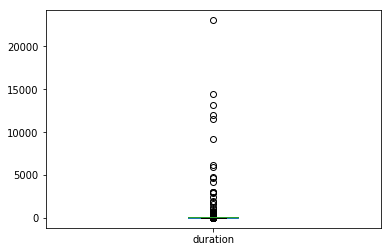

In [427]:
df_x1['duration'].plot.box()

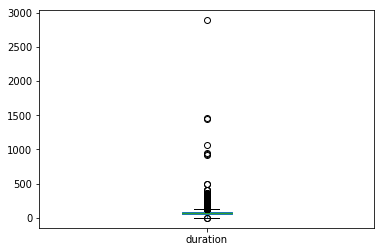

In [428]:
df_team['duration'].plot.box()

<span style="font-size:larger;">Remoção de outliers</span>

As próximas células serão referente a remoção de outliers, para tal usaremos a técnica tukey para identificar e remover os outliers de df_x1 e df_team.

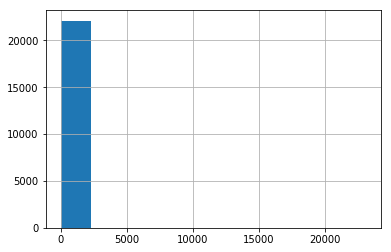

In [429]:
df_x1['duration'].hist()

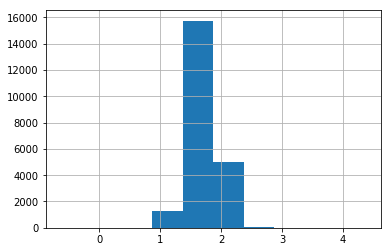

In [430]:
from numpy import log10

df_x1['duration_log']=log10(df_x1['duration'])
df_x1['duration_log'].hist()

In [431]:
q1 = df_x1['duration_log'].quantile(q=0.25)
q3 = df_x1['duration_log'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.21897505093819758

In [432]:
low_outliers = df_x1[df_x1['duration_log'] < (q1-1.5*iqr)]

low_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,duration_log
55328,9,42174307,cdb740e7-4b77-5541-94d8-3dce3d765f4c,2,0,0.233333,False,Goths,Persians,792.0,-0.632023
31846,69,41521700,21f8bff6-fae6-844a-b4d3-0da3152d6ec8,2,0,0.233333,True,Indians,Spanish,1975.5,-0.632023
1656,9,40790116,af55e696-f4cd-ff40-936e-ca4ae52d41d2,2,0,0.233333,False,Aztecs,Burmese,1662.0,-0.632023
57037,85,42227042,96ed99e9-9aa3-b241-abc6-ea5b05c5b559,2,0,0.266667,True,Malay,Malay,827.0,-0.574031
51409,9,42084596,2185e0e4-eeb6-6245-86d8-0d5ea62ff0ac,2,0,0.266667,False,Persians,Britons,1363.0,-0.574031
...,...,...,...,...,...,...,...,...,...,...,...
16374,9,41147851,570c5ee6-d45c-af42-a8d9-52915ecc4fb7,2,0,20.233333,False,Franks,Franks,878.5,1.306067
4388,9,40858761,7c646922-17ae-1549-abc4-ce882f171bd9,2,0,20.266667,False,Huns,Mongols,1202.0,1.306782
59306,29,42257039,bb68d231-93cf-b142-ad3f-2f547c6a4f89,2,0,20.300000,False,Celts,Persians,1218.5,1.307496
35774,9,41626368,1a3fc293-5387-714e-9ba3-24f4b241c990,2,0,20.333333,False,Spanish,Britons,969.5,1.308209


In [433]:
high_outliers =  df_x1[ df_x1['duration_log'] > (q3+1.5*iqr)]

high_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,duration_log
27484,9,41423846,2e2fdf58-4d74-6b48-b72a-f790c89d8234,2,0,154.066667,False,Franks,Aztecs,945.5,2.187709
10518,23,41003734,56a4b086-3939-7242-95eb-8a37a230010d,2,0,154.200000,False,Aztecs,Franks,778.5,2.188084
49878,23,42033769,ba1a705e-3ec7-9c4b-aa03-4e1ff5cf5943,2,0,155.366667,False,Franks,Goths,887.5,2.191358
8116,29,40964843,18499393-0d6d-0e41-9cf8-9593db5f0950,2,0,155.433333,False,Byzantines,Japanese,854.0,2.191544
21769,9,41279873,b5c254cc-b3c6-374d-834a-2689457383db,2,0,156.133333,False,Slavs,Japanese,689.5,2.193496
...,...,...,...,...,...,...,...,...,...,...,...
23669,9,41309833,575f8eb4-a20d-a84d-a42c-c4a192b8d8c2,2,0,11597.533333,False,Aztecs,Britons,859.0,4.064366
19595,9,41226251,da02ea54-8316-694a-ada9-621c092d95f1,2,0,11948.433333,False,Britons,Japanese,956.0,4.077311
41076,9,41805945,9ee3ef49-8b8a-5142-bc26-054400b7ba41,2,0,13159.366667,False,Britons,Turks,952.0,4.119235
56104,67,42202923,bacde957-e1a4-574b-b715-0172bca000f1,2,0,14504.166667,False,Cumans,Spanish,952.0,4.161493


In [434]:
df_x1 = df_x1[(df_x1['duration_log'] < (q3+1.5*iqr)) & (df_x1['duration_log'] > (q1-1.5*iqr))]

df_x1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,duration_log
40562,9,41782522,5aa0403f-d57f-6c48-b132-fc9597d11956,2,0,20.466667,False,Aztecs,Huns,1822.5,1.311047
32199,9,41553449,1e643cc7-1d02-7e41-9f68-6d27c41e4ba8,2,0,20.466667,False,Burmese,Celts,1611.5,1.311047
29505,9,41456243,96fd860c-ebf7-0046-acbc-bcbfbfbf8d1b,2,0,20.466667,False,Mayans,Huns,1689.5,1.311047
40314,9,41781623,c867da92-9c4d-234f-a760-04c059ddab22,2,0,20.466667,False,Bulgarians,Mongols,840.5,1.311047
32555,67,41554732,9260aa93-02e7-044a-8568-9444bad6195f,2,0,20.466667,False,Goths,Ethiopians,784.0,1.311047
...,...,...,...,...,...,...,...,...,...,...,...
56343,23,42203710,f8086fcd-6f8f-ca47-8d64-abe846a6c24a,2,0,151.466667,False,Portuguese,Vikings,769.5,2.180317
35884,29,41626693,df5bb9f4-9895-2c45-93b4-0840e40d9a83,2,0,151.466667,False,Aztecs,Tatars,953.0,2.180317
29034,29,41454666,074c0b7b-c27e-0348-afeb-376d24a67b92,2,0,152.466667,False,Britons,Teutons,847.0,2.183175
17897,23,41165001,b20cc285-b048-fe48-988d-21d594831204,2,0,152.500000,False,Spanish,Britons,746.0,2.183270


In [435]:
df_x1=df_x1.drop('duration_log', 1)

<span style="font-size:larger;">
    Agora faremos a remoção dos outliers da coluna de duração em df_team.
</span>

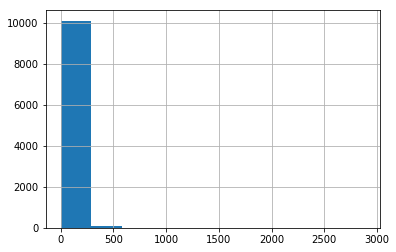

In [436]:
df_team['duration'].hist()

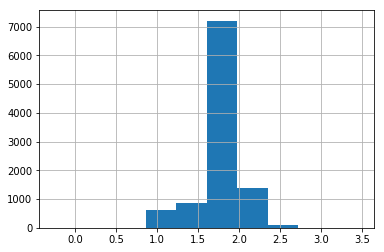

In [437]:
df_team['duration_log']=log10(df_team['duration'])
df_team['duration_log'].hist()

In [438]:
q1 = df_team['duration_log'].quantile(q=0.25)
q3 = df_team['duration_log'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.21504989361289373

In [439]:
low_outliers = df_team[df_team['duration_log'] < (q1-1.5*iqr)]

low_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,duration_log
44826,141,41919291,c4e5240e-69e3-f94e-87f7-25a851be8576,4,0,0.566667,False,Franks,Persians,NaN,NaN,Bulgarians,Burmese,NaN,NaN,1199.000000,-0.246672
5173,31,40873001,88b949a4-48cc-dc46-94dd-391775e9ca41,8,0,1.300000,True,Khmer,Magyars,Huns,Mayans,Saracens,Mongols,Teutons,Byzantines,1806.625000,0.113943
37070,12,41696889,cc53020a-067b-2e44-a84e-3173061a882f,6,1,2.500000,False,Franks,Portuguese,Huns,NaN,Portuguese,Celts,Britons,NaN,774.333333,0.397940
24002,12,41333261,991370a1-10e7-f34a-b7fc-8f315ad41713,4,1,6.966667,False,Berbers,Britons,NaN,NaN,Portuguese,Persians,NaN,NaN,818.500000,0.843025
41813,19,41808346,cccdafdc-f095-1548-a15f-e17a46fff143,4,0,7.966667,False,Vikings,Mongols,NaN,NaN,Italians,Vikings,NaN,NaN,1246.500000,0.901277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35020,71,41623732,9fb89335-926b-774b-9581-a9a75b481741,6,0,24.100000,False,Franks,Indians,Britons,NaN,Britons,Franks,Teutons,NaN,2277.000000,1.382017
43684,141,41884628,7e17c204-6b7f-2c4c-a6bb-fd92111151b7,4,0,24.100000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1356.250000,1.382017
50466,31,42060313,b8513403-57da-1148-bc58-6ee861da9230,4,0,24.100000,True,Franks,Mongols,NaN,NaN,Persians,Ethiopians,NaN,NaN,1679.000000,1.382017
43686,9,41884630,3d8396a0-ce21-ee4e-83fd-476320f2002e,4,0,24.133333,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1103.000000,1.382617


In [440]:
high_outliers =  df_team[ df_team['duration_log'] > (q3+1.5*iqr)]
high_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,duration_log
20438,29,41254237,2dc2bd64-eeb3-6d45-9a18-b5bd958cdf0f,8,0,176.200000,False,Vikings,Goths,Incas,Celts,Mongols,Incas,Goths,Chinese,1299.875000,2.246006
10599,31,41004035,e1ab4533-36cb-d74b-801c-4467d9eb575a,4,0,177.733333,True,Berbers,Spanish,NaN,NaN,Persians,Byzantines,NaN,NaN,1129.000000,2.249769
17286,19,41162885,eba3e13d-645a-f844-87e1-c4617ded668c,8,0,178.466667,False,Britons,Japanese,Cumans,Malay,Malay,Franks,Vikings,Portuguese,1127.200000,2.251557
47183,12,41970119,644b4d47-ee53-b548-bb82-0c3b100115ef,4,1,179.000000,False,Chinese,Persians,NaN,NaN,Ethiopians,Tatars,NaN,NaN,895.750000,2.252853
14610,12,41111895,b87e6bf4-0568-1343-87a0-2fc96afafba0,6,1,179.966667,False,Teutons,Italians,Byzantines,NaN,Franks,Britons,Franks,NaN,939.000000,2.255192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40545,29,41782374,40750e14-f8ef-5d48-84c6-b16c66d3c5a1,6,0,945.833333,False,Goths,Incas,Britons,NaN,Spanish,Teutons,Khmer,NaN,1682.666667,2.975815
53937,31,42114824,69448eb0-76f9-644d-b864-c10ed65a35db,4,0,1064.966667,True,Berbers,Britons,NaN,NaN,Khmer,Turks,NaN,NaN,1030.500000,3.027336
39352,29,41760883,caea635c-5b94-7648-b75b-8e949963e466,8,0,1445.100000,False,Britons,Khmer,Cumans,Burmese,Burmese,Britons,Mongols,Turks,1865.333333,3.159898
39737,29,41762116,33a760f9-01bd-7e4c-93a4-1be115bc0d00,6,0,1463.266667,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1041.400000,3.165323


In [441]:
df_team = df_team[(df_team['duration_log'] < (q3+1.5*iqr)) & (df_team['duration_log'] > (q1-1.5*iqr))]

df_team.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,duration_log
29724,29,41456852,fc142c8b-ceb7-3b4f-ad8a-1e1b5e5cfc99,6,0,24.466667,False,Goths,Malay,Teutons,NaN,Spanish,Indians,Slavs,NaN,1212.166667,1.388575
10175,12,41002564,753ad280-0d72-774f-b23c-c2b1ae59daff,8,1,24.466667,False,Celts,Franks,Byzantines,Incas,Italians,Goths,Mongols,Slavs,1275.000000,1.388575
3270,9,40845443,4dde14e2-543e-2a44-b4de-cb662deb7a1c,8,0,24.466667,False,Vikings,Persians,Chinese,Saracens,Bulgarians,Magyars,Teutons,Vietnamese,1370.250000,1.388575
33063,71,41581135,b8c98855-6297-4444-bcb5-f141bfaabe14,4,0,24.466667,False,Vikings,Spanish,NaN,NaN,Incas,Aztecs,NaN,NaN,1378.500000,1.388575
41049,9,41805764,dcc04096-d275-144b-8a1c-ebda3d10c7e6,6,0,24.500000,False,Franks,Vietnamese,Japanese,NaN,Spanish,Goths,Mayans,NaN,1584.500000,1.389166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50815,12,42061494,b0b777d6-80cc-6d40-9446-b9dddcbd906f,6,1,171.666667,False,Mayans,Mongols,Khmer,NaN,Japanese,Persians,Britons,NaN,1012.000000,2.234686
20266,9,41253677,ef8779b0-e60a-7b4c-b736-d67831098f76,4,0,172.966667,False,Aztecs,Chinese,NaN,NaN,Khmer,Britons,NaN,NaN,1644.000000,2.237962
26346,12,41398515,8b630821-d0a4-2846-bb48-1a161240c6ff,6,1,173.966667,False,Britons,Khmer,Franks,NaN,Mayans,Turks,Lithuanians,NaN,1326.600000,2.240466
20604,141,41254779,246fb523-6d48-ae41-96d9-4710e49aa567,8,0,174.333333,False,Britons,Aztecs,Mayans,Khmer,Vietnamese,Vikings,Slavs,Teutons,792.000000,2.241380


In [442]:
df_team=df_team.drop('duration_log', 1)

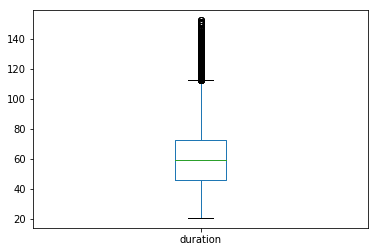

In [443]:
df_x1['duration'].plot.box()

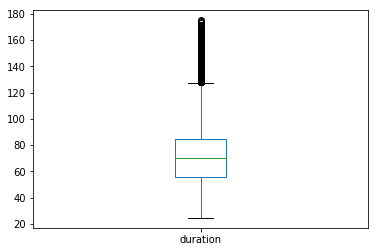

In [444]:
df_team['duration'].plot.box()

<span style="font-size:larger;">
    Partidas de 170 a 120 minutos, dentro do jogo, são partidas longas, mas ainda dentro da normalidade.
</span>

<span style="font-size:larger;">Vamos verificar agora a coluna de average rating</span>

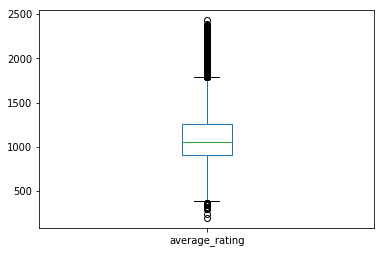

In [445]:
df_x1['average_rating'].plot.box()

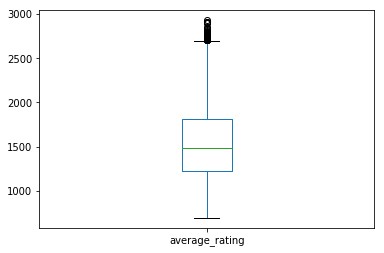

In [446]:
df_team['average_rating'].plot.box()

<span style="font-size:larger;">
    Por mais que sejam de fato pontos fora da curva, esses dados estão corretos, a situação é que há alguns 
    jogadores com classificação muito alta e outros com classificação muito baixa.
</span>

<span style="font-size:larger;">
    Normalização.
</span>

Vamos normalizar a coluna de "average_rating" nos DataFrames

In [447]:
df_x1['average_rating_normalized'] = (df_x1['average_rating'] - df_x1['average_rating'].min()) / (df_x1['average_rating'].max() - df_x1['average_rating'].min())
df_x1.sort_values('average_rating_normalized')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,average_rating_normalized
14629,23,41111949,0662872f-a4b8-d94d-807b-4c362feaeda2,2,0,27.133333,False,Teutons,Vikings,195.5,0.000000
55201,29,42174071,d6884186-b320-d940-a493-d0d2d267d89f,2,0,58.466667,False,Huns,Mayans,238.0,0.019028
53276,29,42112650,55316a56-c775-1948-9b17-466122c6ca2c,2,0,46.066667,False,Slavs,Mayans,300.0,0.046788
49039,23,42030940,3a91f3ff-df68-f440-b29e-e8b51f1f1aab,2,0,83.666667,False,Vikings,Huns,300.5,0.047011
49476,9,42032329,a2de2ece-fa3a-894e-90a3-3951c3e4806d,2,0,36.966667,False,Portuguese,Mayans,312.0,0.052160
...,...,...,...,...,...,...,...,...,...,...,...
11905,9,41020425,cb68543e-842d-e940-a1c5-61247999fc17,2,0,35.366667,False,Japanese,Bulgarians,2368.0,0.972689
48562,9,41996592,ca28163a-8a94-7547-b8da-cc3f13c3eafc,2,0,61.733333,False,Teutons,Aztecs,2371.0,0.974032
32424,9,41554200,33936cbd-834a-134f-836d-d95bffc45647,2,0,27.466667,False,Malians,Lithuanians,2376.0,0.976270
39714,9,41762062,7cf98e3e-bb57-2a44-a3ce-4f90e474b242,2,0,59.966667,False,Mongols,Slavs,2388.5,0.981867


In [448]:
df_team['average_rating_normalized'] = (df_team['average_rating'] - df_team['average_rating'].min()) / (df_team['average_rating'].max() - df_team['average_rating'].min())
df_team.sort_values('average_rating_normalized')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,average_rating_normalized
30246,29,41483588,6b5e3b22-f82a-784d-a8d0-2f2397319cc8,4,0,75.033333,False,Khmer,Burmese,NaN,NaN,Vietnamese,Portuguese,NaN,NaN,692.500000,0.000000
149,31,40745764,db0adc98-04e1-ba4f-bc36-40119ca53b55,4,0,90.700000,True,Vietnamese,Magyars,NaN,NaN,Vietnamese,Tatars,NaN,NaN,701.500000,0.004024
51850,31,42085983,38d943f5-1de9-364e-8697-018609db35f2,4,0,37.733333,True,Vietnamese,Lithuanians,NaN,NaN,Khmer,Slavs,NaN,NaN,705.000000,0.005588
34946,19,41604224,3a33278b-4cdb-af4f-a4bc-25de334c149c,4,0,158.966667,False,Byzantines,Vikings,NaN,NaN,Italians,Spanish,NaN,NaN,705.250000,0.005700
3687,125,40846894,76b63f10-7d32-7048-b326-388c503e1073,4,0,68.200000,False,Byzantines,Magyars,NaN,NaN,Persians,Turks,NaN,NaN,710.500000,0.008047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27623,9,41424191,183a8327-588e-d940-9e95-0d351c106849,6,0,49.266667,False,Saracens,Khmer,Britons,NaN,Ethiopians,Franks,Britons,NaN,2901.166667,0.987445
14920,29,41112976,7c8089d8-247c-d141-a78c-f47de52a884a,8,0,66.366667,False,Celts,Goths,Khmer,Burmese,Celts,Spanish,Burmese,Cumans,2905.250000,0.989270
26345,9,41398518,ee8bbfd8-b556-e24d-87bc-6efc66cf673c,4,0,52.400000,False,Mayans,Indians,NaN,NaN,Franks,Mayans,NaN,NaN,2909.750000,0.991282
55632,9,42175298,3e82962e-4925-0e48-ac5d-a4f38e65ec19,8,0,51.066667,False,Spanish,Teutons,Celts,Ethiopians,Berbers,Vikings,Byzantines,Persians,2909.875000,0.991338


<span style="font-size:larger;">
    Discretização.
</span>

Vamos discretizar a coluna de "duration" nos DataFrames, e classificar as partidas entre: curta, média e longa duração.

In [449]:
duration_class = ['short','medium','long']
df_x1['duration'] = pandas.cut(df_x1['duration'],3,labels = duration_class)
df_x1['duration'].value_counts()

short     12615
medium     7738
long        528
Name: duration, dtype: int64

In [450]:
df_x1['duration']=df_x1['duration'].astype('category')

In [451]:
df_x1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,average_rating_normalized
0,9,40745268,771f9279-8792-be44-bf32-5db278f358aa,2,0,short,False,Byzantines,Magyars,1234.0,0.464965
34575,9,41603118,38ecc78a-b80f-fa4e-8060-d6f9d18b25f7,2,0,short,False,Teutons,Franks,1379.5,0.530110
34576,67,41603114,b21636d2-cb22-584d-9544-337be67e4cb0,2,0,short,False,Persians,Britons,920.5,0.324603
34580,29,41603088,c740a75e-c117-1a4f-be82-e247cb9823b3,2,0,short,False,Goths,Celts,787.5,0.265055
34584,9,41603171,e42046fe-9ac3-fb40-9747-cc2770201fa3,2,0,short,False,Saracens,Berbers,1847.5,0.739646
...,...,...,...,...,...,...,...,...,...,...,...
54565,9,42139394,09f16a9d-b4ae-e445-9517-e1af17ad274e,2,0,long,False,Lithuanians,Portuguese,786.0,0.264383
58739,29,42242774,0c46c85d-ef9d-3441-bd29-76acd50eb001,2,0,long,False,Chinese,Huns,746.5,0.246698
19385,9,41225793,b7658d72-ad99-3243-aed0-668aba86ffa4,2,0,long,False,Mongols,Teutons,576.0,0.170360
42462,9,41843445,9af97dfe-7601-9145-9fb2-6ef394fda6b9,2,0,long,False,Huns,Portuguese,611.0,0.186031


In [452]:
duration_class = ['short','medium','long']
df_team['duration'] = pandas.cut(df_team['duration'],3,labels = duration_class)
df_team['duration'].value_counts()

short     5512
medium    3431
long       299
Name: duration, dtype: int64

In [453]:
df_team['duration']=df_team['duration'].astype('category')

In [454]:
df_team.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,average_rating_normalized
29945,31,41457546,cadae3f6-113e-284e-aa23-8be3efe5a0bd,8,0,short,True,Franks,Persians,Mayans,Slavs,Indians,Celts,Bulgarians,Mayans,1600.500000,0.405946
26624,29,41399431,6c7285c1-a551-dc46-8af2-4ff7f8f2aeb5,6,0,short,False,Vikings,Celts,Cumans,NaN,Mongols,Goths,Persians,NaN,1261.333333,0.254312
48903,29,41997569,b265b4e1-1dee-b645-bbec-a214c6ecb603,4,0,short,False,Aztecs,Chinese,NaN,NaN,Teutons,Britons,NaN,NaN,1260.000000,0.253716
26595,29,41399318,a63b710c-272a-a045-90b0-25bd61200d08,6,0,short,False,Mayans,Franks,Bulgarians,NaN,Bulgarians,Franks,Byzantines,NaN,1497.000000,0.359674
26575,9,41399273,f5721f00-fd59-c948-a750-5d5b04ddfd84,6,0,short,False,Persians,Magyars,Persians,NaN,Saracens,Franks,Byzantines,NaN,1077.166667,0.171976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26982,19,41400552,d2715cdd-1dcb-2a46-a2b2-f7924545507c,4,0,long,False,Ethiopians,Mayans,NaN,NaN,Lithuanians,Byzantines,NaN,NaN,855.250000,0.072762
27015,9,41422284,c4733238-8fee-4c4f-b59d-0c616ea50233,8,0,long,False,Ethiopians,Mongols,Franks,Khmer,Khmer,Persians,Malay,Cumans,1475.285714,0.349966
48729,71,41996969,939d7815-0b33-024e-b609-22443be6b002,6,0,long,False,Franks,Britons,Goths,NaN,Byzantines,Ethiopians,Malay,NaN,1301.000000,0.272046
17472,19,41163541,ad49380d-878a-1b4f-8e22-38219f23b0c4,8,0,long,False,Koreans,Vietnamese,Italians,Malay,Vikings,Vikings,Portuguese,Japanese,1309.285714,0.275751


In [455]:
df_x1=df_x1.reset_index().drop('index', 1)

In [456]:
df_team=df_team.reset_index().drop('index', 1)

In [457]:
df_x1.to_json('../x1_matches_dataset.json')

df_team.to_json('../team_matches_dataset.json')